
# Step 1: Import the required libraries



In [62]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import plotly.express as px
import plotly
import plotly.graph_objects as go
import datetime







# Step 2: Load the dataset

In [63]:

# Assuming the dataset is in the same directory as this script
data = pd.read_csv('ADT.csv')


In [64]:
data = data.drop_duplicates()
data.isnull().sum()

,0
DATE,0
MinTemp,4
MaxTemp,4
AvgTemp,4
Sunrise,0
Sunset,0


In [44]:
# Preview the data
print(data.head())


       DATE  MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
0  1/1/2014     33.0     46.0     40.0      657    1756
1  1/2/2014     35.0     50.0     43.0      657    1756
2  1/3/2014     36.0     45.0     41.0      657    1757
3  1/4/2014     32.0     41.0     37.0      658    1757
4  1/5/2014     24.0     38.0     31.0      658    1758


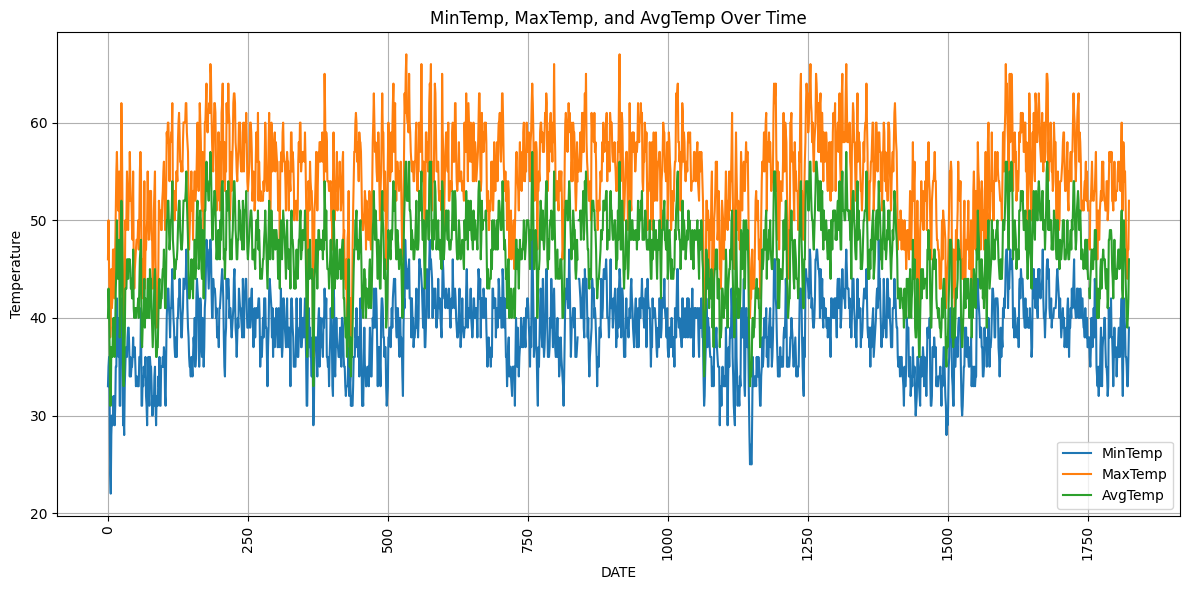

In [65]:
# prompt: line chart for MinTemp,MaxTemp and AvgTemp

# Plotting MinTemp, MaxTemp, and AvgTemp
plt.figure(figsize=(12, 6))
plt.plot(data['MinTemp'], label='MinTemp')
plt.plot(data['MaxTemp'], label='MaxTemp')
plt.plot(data['AvgTemp'], label='AvgTemp')
plt.xlabel('DATE')
plt.ylabel('Temperature')
plt.title('MinTemp, MaxTemp, and AvgTemp Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [66]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)

# Step 3: Plot the data to check for stationarity

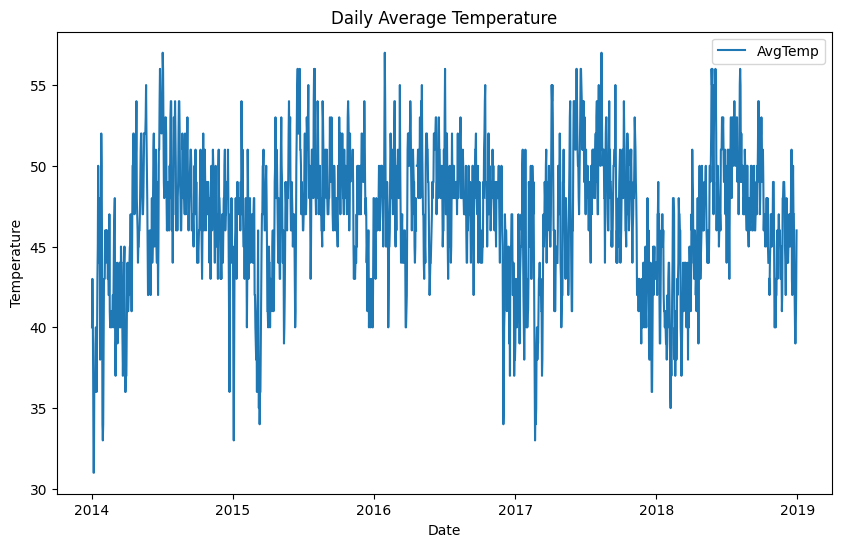

In [67]:

plt.figure(figsize=(10, 6))
plt.plot(data['AvgTemp'], label='AvgTemp')
plt.title('Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

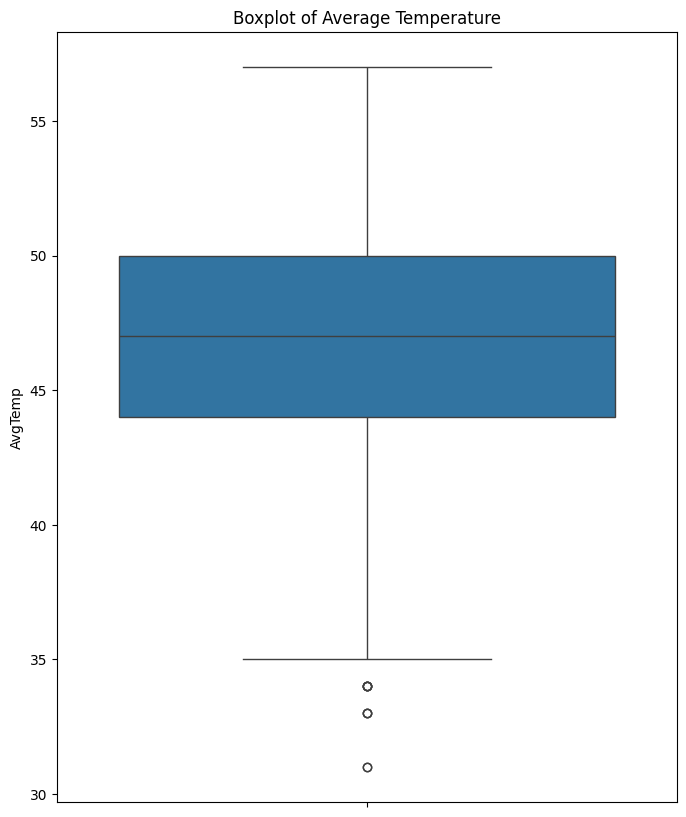

In [68]:
plt.figure(figsize = (8,10))
sns.boxplot(data = df,y = 'AvgTemp')
_=plt.title("Boxplot of Average Temperature")

In [73]:
data = data[['AvgTemp']].groupby(data.index).mean()
x = data.index.to_julian_date()
linfit = np.polyfit(x, data['AvgTemp'], deg=1)
linfit = linfit[0] * x + linfit[1]

fig = px.line(data, title='Average Temperature from 2014 to 2019')
fig.add_trace(go.Scatter(x=data.index, y=linfit, name='Linear Fit'))

In [74]:
# Performing  the Augmented Dickey-Fuller test for stationarity
data['AvgTemp'] = data['AvgTemp'].replace([np.inf, -np.inf], np.nan).fillna(data['AvgTemp'].mean())
from statsmodels.tsa.stattools import adfuller

# Performing  the Augmented Dickey-Fuller test for stationarity
result = adfuller(data['AvgTemp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] > 0.05:
    print("The data is non-stationary.")
else:
    print("The data is stationary.")

# If non-stationary, differencing the data to make it stationary....note:
if result[1] > 0.05:
    data['Differenced'] = data['AvgTemp'].diff().dropna()
    plt.figure(figsize=(10, 6))
    plt.plot(data['Differenced'], label='Differenced Data')
    plt.title('Differenced Data')
    plt.xlabel('DATE')
    plt.ylabel('Differenced Temperature')
    plt.legend()
    plt.show()

    # Re-check stationarity after differencing
    diff_result = adfuller(data['Differenced'].dropna())
    print('ADF Statistic (Differenced):', diff_result[0])
    print('p-value (Differenced):', diff_result[1])
    print('Critical Values (Differenced):', diff_result[4])

ADF Statistic: -6.594563113389793
p-value: 6.977825912591916e-09
Critical Values: {'1%': -3.4339640110318004, '5%': -2.8631363845692475, '10%': -2.567619862152732}
The data is stationary.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                AvgTemp   No. Observations:                 1825
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4172.882
Date:                Fri, 07 Mar 2025   AIC                           8351.764
Time:                        05:20:18   BIC                           8368.290
Sample:                    01-01-2014   HQIC                          8357.860
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7168      0.020     35.574      0.000       0.677       0.756
ma.L1         -0.9625      0.008   -116.998      0.000      -0.979      -0.946
sigma2         5.6809      0.176     32.246      0.0

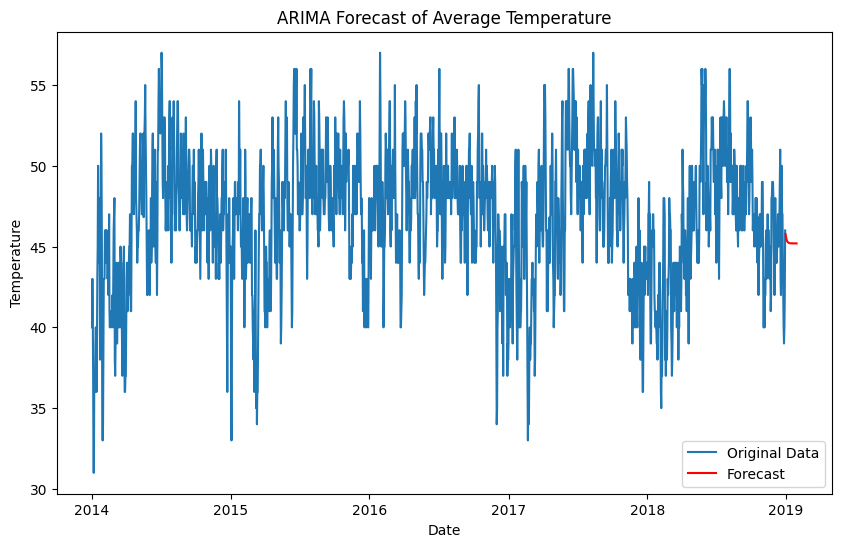

In [75]:
# Step 4: Implement ARIMA to predict average temperature
# Define ARIMA model parameters (p, d, q)
p = 1  # Autoregressive terms
d = 1  # Differencing order (assumed stationary after one differencing)
q = 1  # Moving average terms

model = ARIMA(data['AvgTemp'], order=(p, d, q))
model_fit = model.fit()

# Summary of the ARIMA model
print(model_fit.summary())

# Forecast future values
forecast = model_fit.forecast(steps=30)  # Predict next 30 days
print("Forecasted Values:")
print(forecast)

# Plot original data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data['AvgTemp'], label='Original Data')
plt.plot(pd.date_range(start=data.index[-1], periods=31, freq='D')[1:], forecast, label='Forecast', color='RED')
plt.title('ARIMA Forecast of Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()